In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_confirmed = pd.read_csv('confirmed_global.csv')
df_death = pd.read_csv('deaths_global.csv')
df_recovered = pd.read_csv('recovered_global.csv')

In [3]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331


In [4]:
df_covid = pd.DataFrame()
df_covid['confirmed'] = pd.DataFrame(df_confirmed.iloc[:,4:].sum())
df_covid['recovered'] = pd.DataFrame(df_recovered.iloc[:,4:].sum())
df_covid['death'] = pd.DataFrame(df_death.iloc[:,4:].sum())

In [5]:
df_covid.head()

,confirmed,recovered,death
1/22/20,557,30,17
1/23/20,655,32,18
1/24/20,941,39,26
1/25/20,1433,42,42
1/26/20,2118,56,56


In [6]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 1/22/20 to 4/10/21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   confirmed  445 non-null    int64
 1   recovered  445 non-null    int64
 2   death      445 non-null    int64
dtypes: int64(3)
memory usage: 13.9+ KB


In [7]:
df_covid.describe()

,confirmed,recovered,death
count,4.450000e+02,4.450000e+02,4.450000e+02
mean,4.199181e+07,2.459574e+07,1.045654e+06
std,4.288827e+07,2.441775e+07,8.875335e+05
min,5.570000e+02,3.000000e+01,1.700000e+01
25%,4.272324e+06,1.488767e+06,2.957270e+05
50%,2.550909e+07,1.682342e+07,8.510230e+05
75%,7.693459e+07,4.472555e+07,1.698672e+06
max,1.353559e+08,7.689112e+07,2.927807e+06


In [8]:
df_covid.index = pd.to_datetime(df_covid.index)

<Axes: >

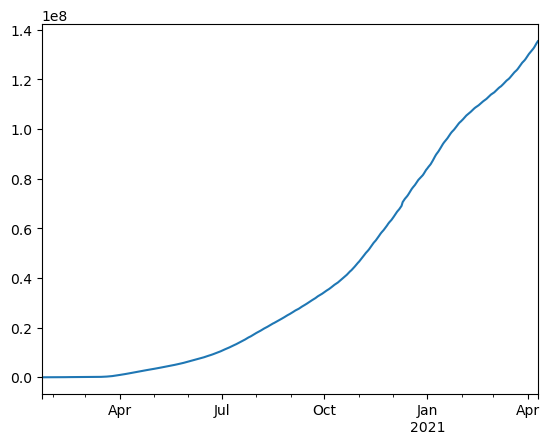

In [9]:
df_covid['confirmed'].plot()

Certainly, if you've observed a significant increase in the number of people confirmed for a particular event or phenomenon starting from around July 2020 that show trend in this data

<Axes: >

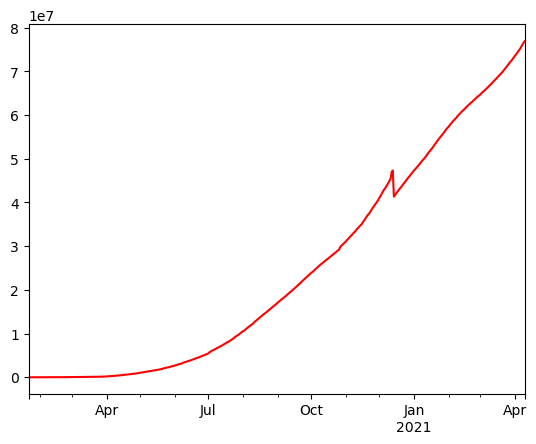

In [10]:
df_covid['recovered'].plot(color = 'r')

The sudden decrease in the number of recovered COVID-19 cases in December 2020, despite an increase in the number of recovered cases, could be attributed to various factors.

<Axes: >

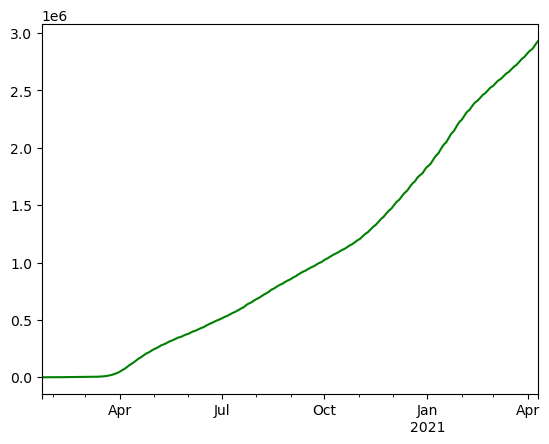

In [27]:
df_covid['death'].plot(color = 'green')

Opposite of confirmed data number of death starts to increase from Apr 2020 

<Axes: >

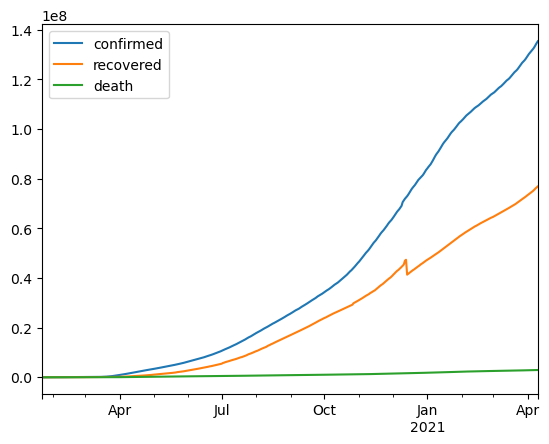

In [12]:
df_covid.plot()

In [13]:
lst = ['Country/Region','Lat','Long','Province/State']
country_con = df_confirmed['Country/Region']
df_confirmed.drop(lst,axis= 1 ,inplace=True)
country_rec = df_recovered['Country/Region']
df_recovered.drop(lst,axis= 1 ,inplace=True)
country_de = df_death['Country/Region']
df_death.drop(lst,axis= 1 ,inplace=True)

In [14]:
df_confirmed.columns = pd.to_datetime(df_confirmed.columns)
df_recovered.columns = pd.to_datetime(df_recovered.columns)
df_death.columns = pd.to_datetime(df_death.columns)

In [15]:
month_con = df_confirmed.groupby(df_confirmed.columns.strftime("%B %Y"), axis=1).sum()
month_con = month_con.set_index(country_con)
month_rec = df_recovered.groupby(df_recovered.columns.strftime("%B %Y"), axis=1).sum()
month_rec = month_rec.set_index(country_rec)
month_de = df_death.groupby(df_death.columns.strftime("%B %Y"), axis=1).sum()
month_de = month_de.set_index(country_de)

In [16]:
month_con

,April 2020,April 2021,August 2020,December 2020,February 2020,February 2021,January 2020,January 2021,July 2020,June 2020,March 2020,March 2021,May 2020,November 2020,October 2020,September 2020
Country/Region,,,,,,,,,,,,,,,,
Afghanistan,27074,567835,1163297,1522209,6,1553102,0,1668119,1077247,750944,1164,1737068,225674,1308111,1245948,1163868
Albania,15632,1268444,230278,1540509,0,2610775,0,2088163,119660,50880,2232,3652195,28873,866248,523084,350148
Algeria,69497,1178246,1185076,2884170,5,3096714,0,3212268,674286,337819,4823,3577898,211394,2074384,1683631,1458290
Andorra,19106,122912,31382,230115,0,293412,0,279226,27174,25511,2787,352375,23498,174907,103067,45275
Angola,601,228369,59160,508018,0,569508,0,580289,20049,4660,48,666295,1639,404417,233349,111469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,7778,26481,28091,43541,398,61812,18,48059,12278,10196,2514,78997,9465,38113,35048,31897
West Bank and Gaza,8597,2553133,519581,3560267,0,4737219,0,4668798,230938,25938,1355,6630876,12240,1983791,1445125,965368
Yemen,31,49191,57598,64649,0,60549,0,65439,46644,23264,0,96700,4101,62038,63654,60327


In [17]:
month_rec

,April 2020,April 2021,August 2020,December 2020,February 2020,February 2021,January 2020,January 2021,July 2020,June 2020,March 2020,March 2021,May 2020,November 2020,October 2020,September 2020
Country/Region,,,,,,,,,,,,,,,,
Afghanistan,2927,518922,843438,1207801,0,1358287,0,1403684,688117,184768,26,1541980,24129,1058724,1039280,949104
Albania,7902,946463,120294,819127,0,1622660,0,1250570,67686,32742,241,2525857,21760,424181,305370,200469
Algeria,24072,820526,826991,1902624,0,2126923,0,2181520,467472,233399,594,2481861,109804,1373852,1177057,1026971
Andorra,5636,115571,26677,209606,0,277194,0,253747,24877,23239,37,336906,18505,143348,69118,32128
Angola,129,212647,22283,286751,0,527106,0,473400,5708,1668,1,618101,466,196092,94176,41899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,5006,24062,15414,38988,214,44686,0,42994,11005,9611,604,65765,7882,33476,32150,27319
West Bank and Gaza,1707,2239916,308105,2808269,0,4408354,0,4235190,56636,12527,208,5898926,8724,1652646,1233228,668084
Yemen,1,18266,30997,42906,0,40047,0,43880,21371,5661,0,46994,134,41312,41489,36687


In [18]:
month_de

,April 2020,April 2021,August 2020,December 2020,February 2020,February 2021,January 2020,January 2021,July 2020,June 2020,March 2020,March 2021,May 2020,November 2020,October 2020,September 2020
Country/Region,,,,,,,,,,,,,,,,
Afghanistan,890,25067,42101,62357,0,67864,0,71838,33518,15016,27,76227,5007,49133,46287,42987
Albania,728,22768,6945,31857,0,44037,0,39480,3302,1221,91,63810,975,19239,13731,10286
Algeria,9197,31106,42428,81232,0,82303,0,87734,32720,23600,324,94314,16901,65248,57192,48964
Andorra,917,1178,1632,2478,0,2986,0,2805,1612,1545,39,3499,1518,2266,1895,1590
Angola,60,5443,2627,11686,0,13697,0,13481,915,210,6,16193,85,9636,7325,4268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,350,637,1085,0,980,0,1085,3,0,0,1085,0,1050,1085,1048
West Bank and Gaza,51,27328,3524,32756,0,54177,0,51826,1465,99,6,72142,71,17527,12450,6972
Yemen,2,9674,16517,18799,0,17322,0,18984,12932,5932,0,22561,786,18078,18462,17436


In [19]:
max_value_con = pd.DataFrame(month_con.max(axis=1))
max_month_con = pd.DataFrame(month_con.idxmax(axis=1))
max_value_rec = pd.DataFrame(month_rec.max(axis=1))
max_month_rec = pd.DataFrame(month_rec.idxmax(axis=1))
max_value_de = pd.DataFrame(month_de.max(axis=1))
max_month_de = pd.DataFrame(month_de.idxmax(axis=1))

In [20]:
max_con = pd.concat([max_month_con,max_value_con],axis= 1)
max_con.columns = ['Maximum month','Number of confirmed people']
max_rec = pd.concat([max_month_rec,max_value_rec],axis= 1)
max_rec.columns = ['Maximum month','Number of recovered people']
max_de = pd.concat([max_month_de,max_value_de],axis= 1)
max_de.columns = ['Maximum month','Number of dead people']

In [21]:
max_con

,Maximum month,Number of confirmed people
Country/Region,,
Afghanistan,March 2021,1737068
Albania,March 2021,3652195
Algeria,March 2021,3577898
Andorra,March 2021,352375
Angola,March 2021,666295
...,...,...
Vietnam,March 2021,78997
West Bank and Gaza,March 2021,6630876
Yemen,March 2021,96700


In [22]:
max_con['Maximum month'].value_counts()

March 2021       256
August 2020        9
December 2020      4
January 2021       3
May 2020           2
Name: Maximum month, dtype: int64

In [23]:
max_rec

,Maximum month,Number of recovered people
Country/Region,,
Afghanistan,March 2021,1541980
Albania,March 2021,2525857
Algeria,March 2021,2481861
Andorra,March 2021,336906
Angola,March 2021,618101
...,...,...
Vietnam,March 2021,65765
West Bank and Gaza,March 2021,5898926
Yemen,March 2021,46994


In [24]:
max_rec['Maximum month'].value_counts()

March 2021       224
January 2021       9
August 2020        9
December 2020      8
April 2020         3
July 2020          1
October 2020       1
May 2020           1
April 2021         1
June 2020          1
November 2020      1
Name: Maximum month, dtype: int64

In [25]:
max_de

,Maximum month,Number of dead people
Country/Region,,
Afghanistan,March 2021,76227
Albania,March 2021,63810
Algeria,March 2021,94314
Andorra,March 2021,3499
Angola,March 2021,16193
...,...,...
Vietnam,December 2020,1085
West Bank and Gaza,March 2021,72142
Yemen,March 2021,22561


In [26]:
max_de['Maximum month'].value_counts()

March 2021       196
August 2020       35
April 2020        25
December 2020      8
January 2021       4
April 2021         4
May 2020           1
March 2020         1
Name: Maximum month, dtype: int64